# Pre Trabajo Práctico 1
##### Daniel Caicedo - Ignacio Chiapella - Miguel Guerrero - Juan Knebel


In [2]:
# Para visuzalización en notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 22
from IPython.display import Audio, Markdown, Image
import seaborn as sns

# Números y Datos
import numpy as np
import pandas as pd

# Archivos
import urllib.request
import glob

# Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer


## Carga metadata y audio_features

In [3]:
### Ubicación de los archivos
path = "../data/audio_features/"

metadata = pd.read_csv(path+"metadata.csv", index_col='id')
audio_features = pd.read_csv(path+"audio_features.csv", index_col='id')

In [4]:
print(metadata.shape)
print(audio_features.shape)

(2206, 17)
(2206, 17)


## Separar etiquetas de Dataset metadata

In [5]:
metadata_clean = metadata.loc[:,['album','artists','name','popularity','genre']]
metadata_clean.head()

album  \
id                                                                          
5i2sgqnzaxYpvXmGAB592h  {'album_type': 'ALBUM', 'artists': [{'external...   
4mGzm5ahHxMX5IhVWbU7cl  {'album_type': 'ALBUM', 'artists': [{'external...   
4DEn3hZzSs9MFwFNDla5Y5  {'album_type': 'ALBUM', 'artists': [{'external...   
5P6vo51dtkBYWXswH1twvK  {'album_type': 'ALBUM', 'artists': [{'external...   
29TZQMVLv25CBm3bYn2EIQ  {'album_type': 'ALBUM', 'artists': [{'external...   

                             artists                                     name  \
id                                                                              
5i2sgqnzaxYpvXmGAB592h     Stan Getz  Corcovado - Quiet Nights Of Quiet Stars   
4mGzm5ahHxMX5IhVWbU7cl   Nina Simone                        I Loves You Porgy   
4DEn3hZzSs9MFwFNDla5Y5   Chick Corea                 Swedish Landscape - Live   
5P6vo51dtkBYWXswH1twvK  Snarky Puppy                                   Lingus   
29TZQMVLv25CBm3bYn2EIQ    Sam Rivers                             Kinda Dukish   

                        popularity genre  
id                                        
5i2sgqnzaxYpvXmGAB592h          12  jazz  
4mGzm5ahHxMX5IhVWbU7cl           6  jazz  
4DEn3hZzSs9MFwFNDla5Y5          15  jazz  
5P6vo51dtkBYWXswH1twvK           0  jazz  
29TZQMVLv25CBm3bYn2EIQ          12  jazz

# Dataset audio_features - scatter matrix

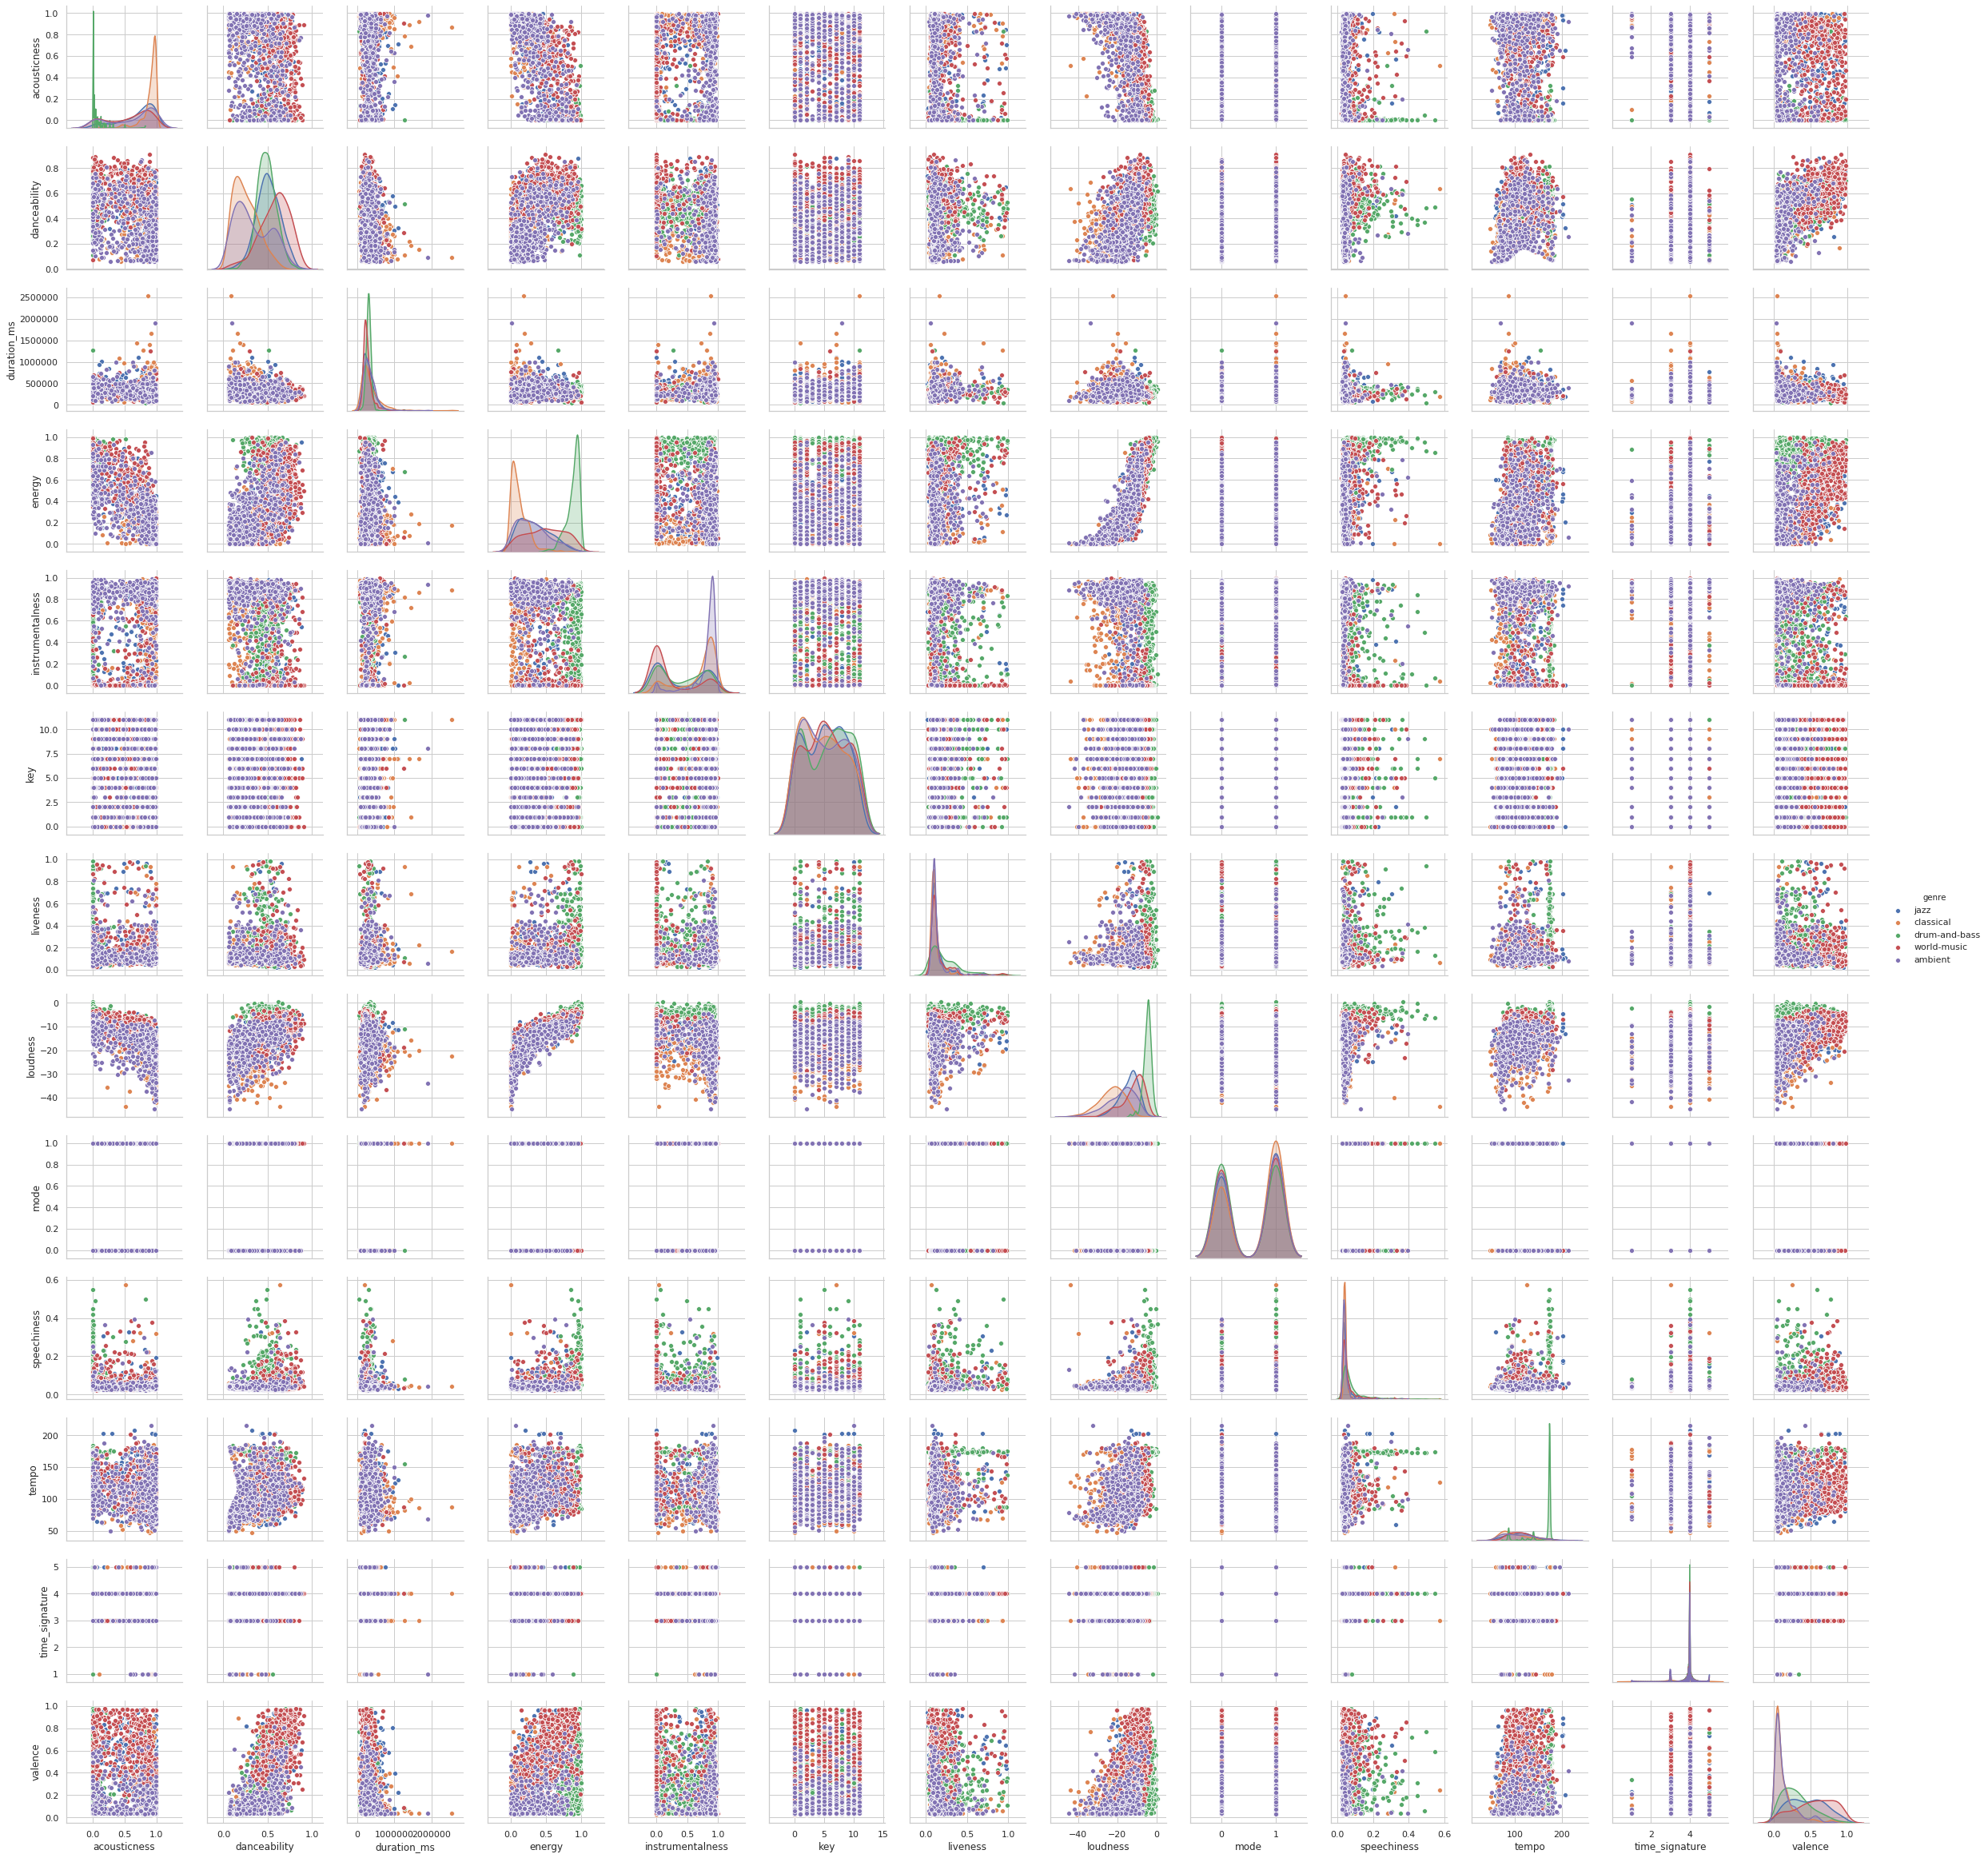

In [8]:
## Agrego el Género a los features
audio_genero = pd.concat([audio_features,metadata_clean.genre],axis=1)

## Scatter dataset Original
sns.set(style="whitegrid")
sns_plot = sns.pairplot(audio_genero,hue='genre')
sns_plot.savefig("scatter-af-complete.png")

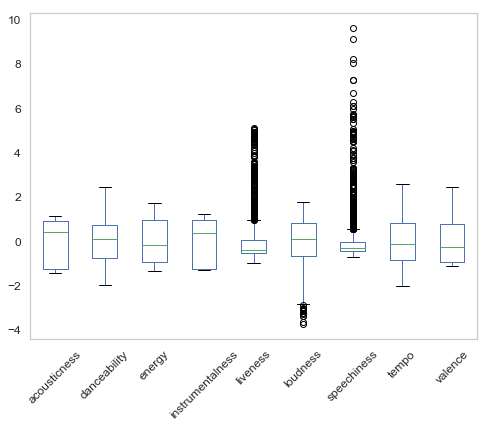

In [106]:
## Estandarización
ss = StandardScaler()
audiof_std = pd.DataFrame(ss.fit_transform(audio_features), index=audio_features.index, columns=audio_features.columns)
#audiof_std

#sns.pairplot(pd.concat([audiof_std,metadata_clean.genre],axis=1),hue='genre');

## Hacer boxplot para ver outliers con dataset estandarizado
audiof_std.boxplot(grid=False, rot=45, fontsize=12)


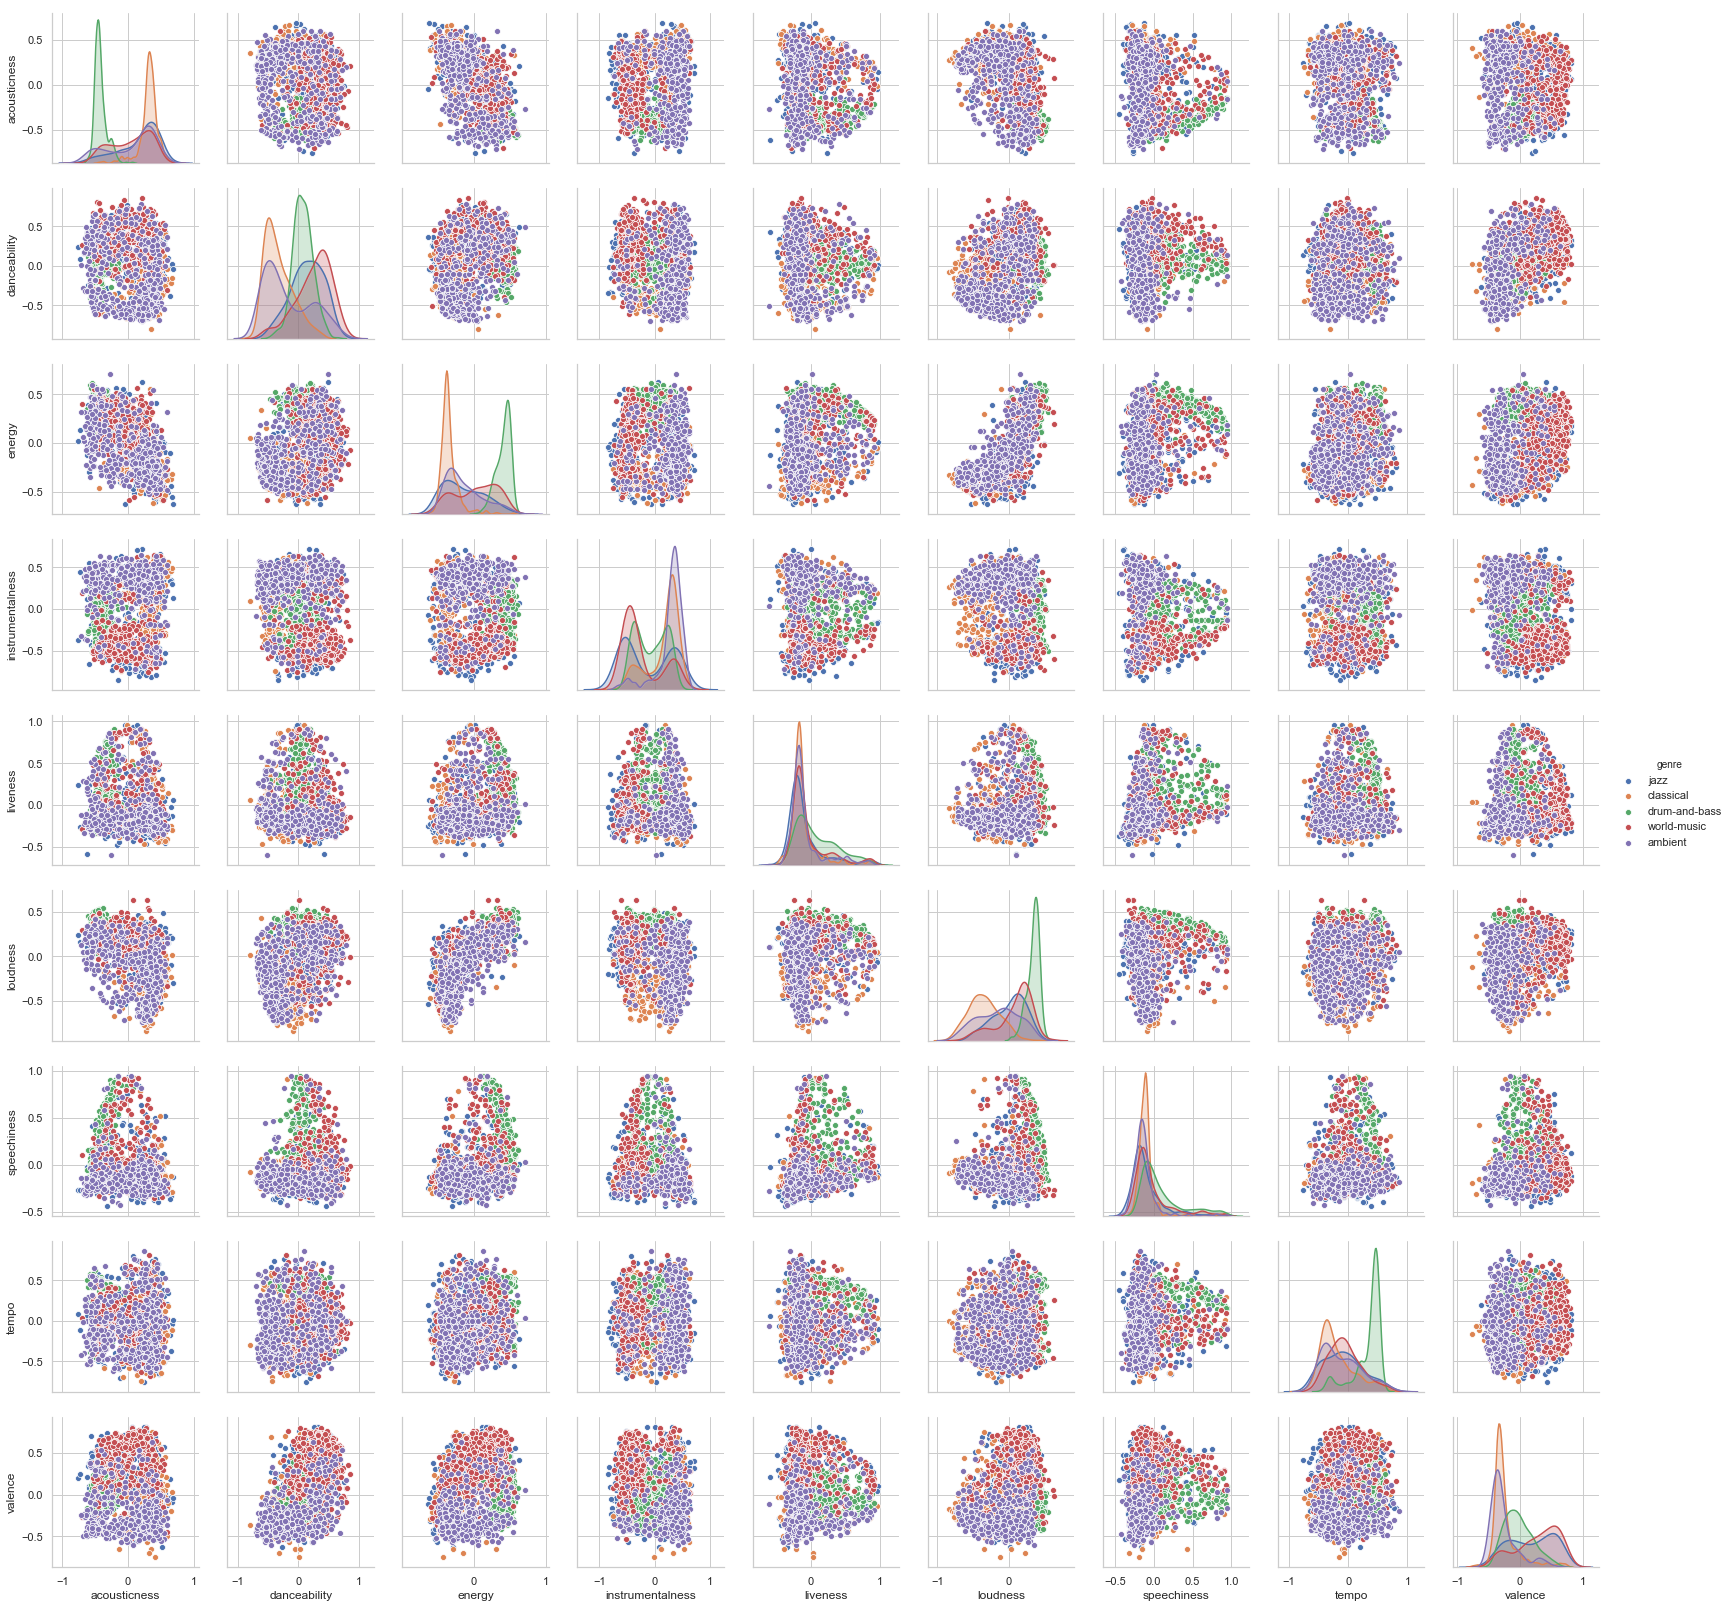

In [108]:
## Normalizar el dataset Estandarizado
audiof_esta_nor = pd.DataFrame(nnor.fit_transform(audiof_std), index=audio_features.index, columns=audio_features.columns)
#audiof_nestd

## Scatter 
sns.pairplot(pd.concat([audiof_esta_nor,metadata_clean.genre],axis=1),hue='genre');

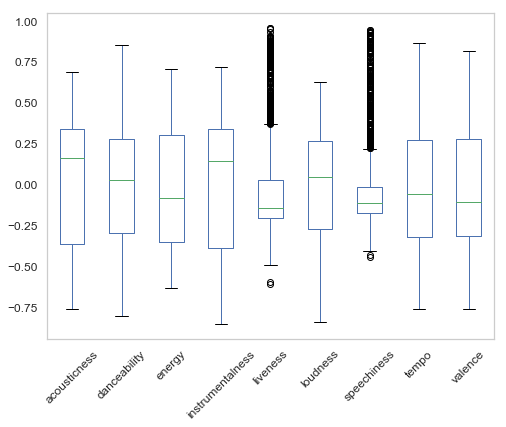

In [109]:
#Boxplot con dataset Estandarizado y luego normalizado

audiof_esta_nor.boxplot(grid=False, rot=45, fontsize=12)